In [93]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [102]:
df = pd.read_csv('./dataset.csv')
df_2 = pd.get_dummies(df,drop_first=True)

In [103]:
df.head()

,traffic_volume,driver_age,license,visibility,conflict
0,high,Young,no,fair,conflict_no
1,high,Young,no,excellent,conflict_no
2,high,Medium,no,fair,conflict_yes
3,high,Medium,yes,fair,conflict_yes
4,medium,Young,no,fair,conflict_no


In [150]:
import numpy as np
pivot_table = pd.pivot_table(
    df[[0,1]], 
     
    index=df.iloc[0], 
    columns=df.iloc[1], 
    
    aggfunc=np.size, 
    fill_value=0
)

KeyError: "None of [Int64Index([0, 1], dtype='int64')] are in the [columns]"

In [145]:



# drivers age
no = [2,1,2]
      
pivot_table

driver_age                  license               visibility  \
conflict       conflict_no conflict_yes conflict_no conflict_yes conflict_no   
traffic_volume                                                                 
high                     2            2           2            2           2   
low                      1            3           1            3           1   
medium                   2            4           2            4           2   

                             
conflict       conflict_yes  
traffic_volume               
high                      2  
low                       3  
medium                    4

In [130]:
pivot_table['sum'] = pivot_table.sum(axis=1)
pivot_table['prob'] = pivot_table['sum'] / 28
pivot_table

#yes = 18
#no = 10



conflict,conflict_no,conflict_yes,sum,prob
traffic_volume,,,,
high,4,4,8,0.285714
low,2,6,8,0.285714
medium,4,8,12,0.428571


In [106]:
total_no = pivot_table.loc['conflict_no','sum'] = pivot_table.loc['conflict_no'].sum()
total_yes = pivot_table.loc['conflict_yes','sum'] = pivot_table.loc['conflict_yes'].sum()

total = total_no+total_yes

pivot_table.loc['conflict_no','probability'] = total_no / total
pivot_table.loc['conflict_yes','probability'] = total_yes / total

KeyError: 'conflict_no'

In [107]:
pivot_table

driver_age                  license               visibility  \
conflict       conflict_no conflict_yes conflict_no conflict_yes conflict_no   
traffic_volume                                                                 
high                     2            2           2            2           2   
low                      1            3           1            3           1   
medium                   2            4           2            4           2   

                             
conflict       conflict_yes  
traffic_volume               
high                      2  
low                       3  
medium                    4

In [108]:
df_2

,traffic_volume_low,traffic_volume_medium,driver_age_Old,driver_age_Young,license_yes,visibility_fair,conflict_conflict_yes
0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,1,1
4,0,1,0,1,0,1,0
5,0,1,1,0,1,1,1
6,0,1,0,1,1,0,1
7,0,1,0,0,0,0,1
8,0,1,1,0,0,0,0
9,0,1,1,0,0,1,1


In [110]:
X = df_2.drop('conflict_conflict_yes',axis=1)
y = df_2['conflict_conflict_yes'] 

In [111]:
X

,traffic_volume_low,traffic_volume_medium,driver_age_Old,driver_age_Young,license_yes,visibility_fair
0,0,0,0,1,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,0,1,1
4,0,1,0,1,0,1
5,0,1,1,0,1,1
6,0,1,0,1,1,0
7,0,1,0,0,0,0
8,0,1,1,0,0,0
9,0,1,1,0,0,1


In [112]:
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

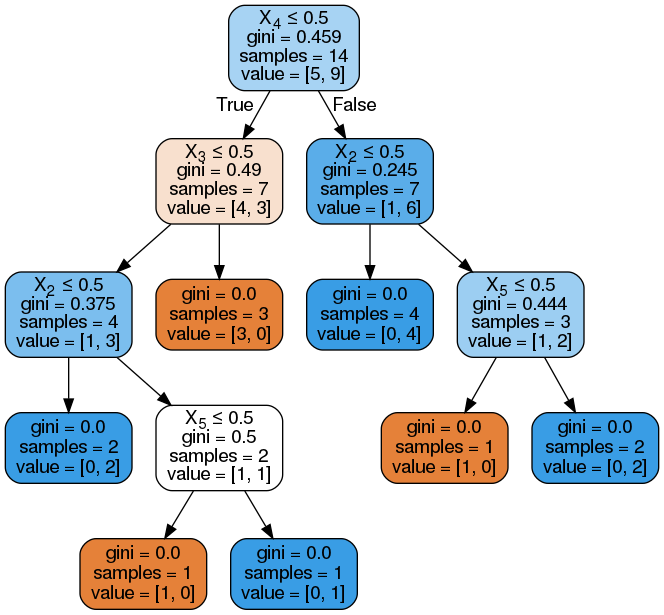

In [113]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [114]:
df_2

,traffic_volume_low,traffic_volume_medium,driver_age_Old,driver_age_Young,license_yes,visibility_fair,conflict_conflict_yes
0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,1,1
4,0,1,0,1,0,1,0
5,0,1,1,0,1,1,1
6,0,1,0,1,1,0,1
7,0,1,0,0,0,0,1
8,0,1,1,0,0,0,0
9,0,1,1,0,0,1,1


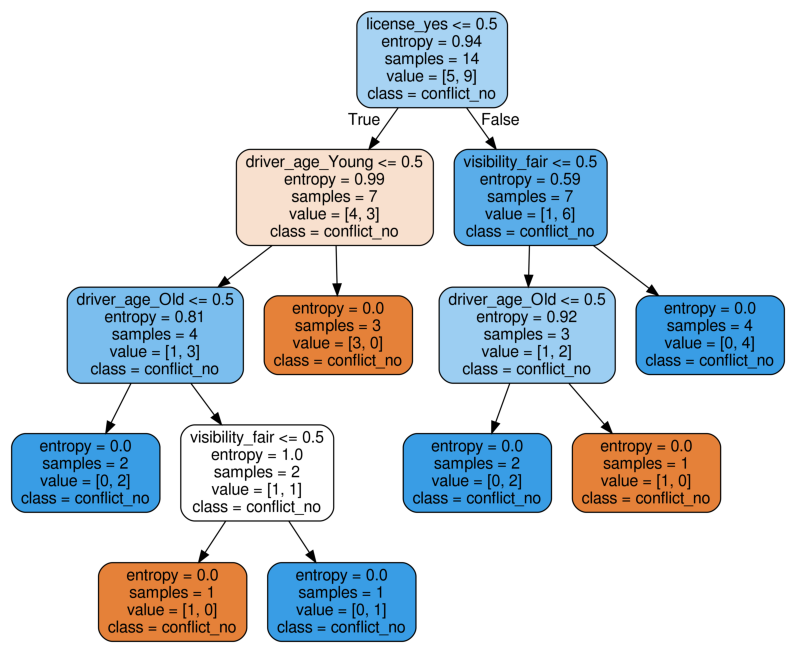

In [118]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X,y)

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtree, out_file='tree1.dot', 
                feature_names = X.columns,
                class_names = df['conflict'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree1.png'))
plt.axis('off');
plt.show();

AttributeError: 'sklearn.tree._tree.Tree' object has no attribute 'best_error'

In [131]:
from __future__ import division
from math import log


def entropy(pi):
    '''
    return the Entropy of a probability distribution:
    entropy(p) = − SUM (Pi * log(Pi) )

    defintion:
            entropy is a metric to measure the uncertainty of a probability distribution.

    entropy ranges between 0 to 1

    Low entropy means the distribution varies (peaks and valleys).
    High entropy means the distribution is uniform.

    See:
            http://www.cs.csi.cuny.edu/~imberman/ai/Entropy%20and%20Information%20Gain.htm
    '''

    total = 0
    for p in pi:
        p = p / sum(pi)
        if p != 0:
            total += p * log(p, 2)
        else:
            total += 0
    total *= -1
    return total


def gain(d, a):
    '''
    return the information gain:
    gain(D, A) = entropy(D)−􏰋 SUM ( |Di| / |D| * entropy(Di) )
    '''

    total = 0
    for v in a:
        total += sum(v) / sum(d) * entropy(v)

    gain = entropy(d) - total
    return gain
